# Black friday (EDA and Data Engineering)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
# improt data
df_train = pd.read_csv(r"C:\Users\admin\Downloads\archive (7)\train.csv")

In [97]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [98]:
#import test data
df_test = pd.read_csv(r"C:\Users\admin\Downloads\archive (7)\test.csv")

In [99]:
# merge the data 
df = pd.concat([df_train,df_test],ignore_index=True)

In [100]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [101]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [102]:
## data cleaning
df.drop(['User_ID'],axis=1,inplace=True)

In [103]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [104]:
# df['Gender']  = pd.get_dummies(df['Gender'],drop_first=1)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'M' else 0)
## df['Gender'] = df['Gender'].map({"M":0,"F":1})

In [105]:
df.Gender.value_counts()

Gender
1    590031
0    193636
Name: count, dtype: int64

In [106]:
df['Gender'].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

In [107]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [108]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [109]:
# df.rename(columns={'Ag@e':"Age"})

In [110]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [111]:
df.Age.value_counts()

Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: count, dtype: int64

In [112]:
df['Age'] = df['Age'].map({'0-17':1,'18:25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [113]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

df['Age'] = labelEncoder.fit_transform(df['Age'])

In [114]:
df.Age.unique()

array([0, 5, 1, 3, 4, 2, 6], dtype=int64)

In [115]:
## multicollinearity problem for drop_first=True
df_city = pd.get_dummies(df['City_Category'],drop_first=True).astype(int)

In [116]:
df = pd.concat([df,df_city],axis=1)

In [117]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,5,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [118]:
df = df.drop('City_Category',axis=1)

In [119]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,5,16,4+,0,8,NaN,NaN,7969.0,0,1


In [120]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [121]:
df['Age'].isnull().sum()

0

In [122]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [123]:
## focus on replacing missing valus
import statistics
df['Product_Category_2']

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
783662     NaN
783663     8.0
783664     5.0
783665    16.0
783666     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [124]:
## replace the misssing value
# mode = statistics.mode(df['Product_Category_2'])
# df['Product_Category_2'] = df['Product_Category_2'].apply(lambda x: mode if pd.isnull(x) else x)

# or

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])


In [125]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [126]:
df['Product_Category_3'].mode()[0]

16.0

In [127]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [128]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,5,16,4+,0,8,8.0,16.0,7969.0,0,1


In [129]:
df.shape

(783667, 12)

In [130]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [131]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+',"")

In [132]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 62.8+ MB


In [134]:
## visualization
# sns.pairplot(data =df)

<Axes: xlabel='Age', ylabel='Purchase'>

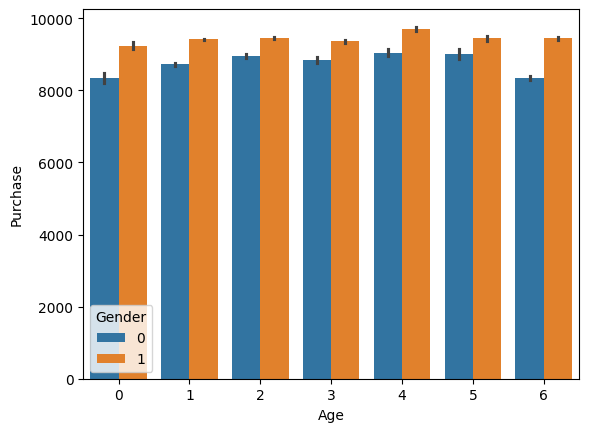

In [135]:
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender')

In [136]:
df_train = df[~df['Purchase'].isnull()]

In [137]:
df_test = df[df['Purchase'].isnull()]

In [138]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233599 entries, 550068 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  233599 non-null  object 
 1   Gender                      233599 non-null  int64  
 2   Age                         233599 non-null  int64  
 3   Occupation                  233599 non-null  int64  
 4   Stay_In_Current_City_Years  233599 non-null  int32  
 5   Marital_Status              233599 non-null  int64  
 6   Product_Category_1          233599 non-null  int64  
 7   Product_Category_2          233599 non-null  float64
 8   Product_Category_3          233599 non-null  float64
 9   Purchase                    0 non-null       float64
 10  B                           233599 non-null  int32  
 11  C                           233599 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 20.5+ MB


In [139]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 48.3+ MB


In [140]:
X = df_train.drop('Purchase',axis=1)
Y = df_train['Purchase']

In [141]:
X.shape   

(550068, 11)

In [142]:
Y.shape

(550068,)

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [144]:
    Y_train.head()

396876    19307.0
433826     7859.0
516298    10718.0
193380     9823.0
273542    13702.0
Name: Purchase, dtype: float64

In [145]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)


In [146]:
## feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)